In [27]:
import pandas as pd

In [37]:
df = pd.read_csv('../DATA/churn_mock_data.csv').drop(columns=['customer_id', 'effect', 'churn_prob', 'post_intervention_satisfaction'])

In [29]:
df

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned
0,0,45.960570,M,bajo,urbano,2,8.005516,1,48.858802,5.221074,4,0.109862,1,0,0
1,1,38.340828,M,medio,urbano,3,6.450702,0,56.754625,6.088374,0,0.158069,0,1,0
2,2,47.772262,M,alto,urbano,2,7.502395,1,70.299616,6.890282,2,0.052697,0,1,0
3,3,58.276358,M,medio,urbano,1,11.838634,1,55.603568,5.125064,1,0.071723,0,0,0
4,4,37.190160,F,bajo,urbano,2,6.836628,0,47.798866,7.249211,1,0.064875,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.613225,F,medio,urbano,4,5.085338,0,75.055422,5.735858,0,0.190032,1,1,0
9996,9996,18.000000,F,medio,urbano,4,0.630427,3,62.622381,3.665672,7,0.606405,0,0,0
9997,9997,31.536199,M,medio,rural,3,7.375893,2,58.757085,6.775811,2,0.175365,0,1,0
9998,9998,45.949187,F,medio,urbano,2,6.614678,1,45.539655,4.503459,5,0.578835,0,0,0


In [30]:
df.describe()

,customer_id,age,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,40.134692,2.539200,5.205085,1.396700,61.478021,5.265083,1.979700,0.243880,0.391300,0.331500,0.216600
std,2886.89568,11.674506,1.113098,3.523520,1.262493,13.330286,1.666573,1.647167,0.182531,0.488066,0.470776,0.411948
min,0.00000,18.000000,1.000000,0.000000,0.000000,13.670133,1.000000,0.000000,0.004912,0.000000,0.000000,0.000000
25%,2499.75000,31.928914,2.000000,2.448665,0.000000,52.254610,4.129104,1.000000,0.101695,0.000000,0.000000,0.000000
50%,4999.50000,39.968860,2.000000,5.053041,1.000000,61.525688,5.283438,2.000000,0.193276,0.000000,0.000000,0.000000
75%,7499.25000,48.052971,3.000000,7.625276,2.000000,70.728118,6.418010,3.000000,0.342772,1.000000,1.000000,0.000000
max,9999.00000,80.000000,5.000000,19.818046,5.000000,107.405522,10.000000,12.000000,0.958825,1.000000,1.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  10000 non-null  int64  
 1   age                          10000 non-null  float64
 2   gender                       10000 non-null  object 
 3   income_bracket               10000 non-null  object 
 4   region                       10000 non-null  object 
 5   household_size               10000 non-null  int64  
 6   tenure                       10000 non-null  float64
 7   payment_history              10000 non-null  int64  
 8   monthly_consumption          10000 non-null  float64
 9   customer_satisfaction_score  10000 non-null  float64
 10  complaints_last_year         10000 non-null  int64  
 11  churn_risk_score             10000 non-null  float64
 12  flag_unsatisfied             10000 non-null  int64  
 13  treatment        

In [42]:
# Convert to categorical: 'gender', 'income_bracket', 'region', 'churned'
for v in ['gender', 'income_bracket', 'region', 'churned']:
    df[v] = df[v].astype('category')
    
for v in ['flag_unsatisfied', 'treatment', 'churned']:
    df[v] = df[v].astype('bool')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          10000 non-null  float64 
 1   gender                       10000 non-null  category
 2   income_bracket               10000 non-null  category
 3   region                       10000 non-null  category
 4   household_size               10000 non-null  int64   
 5   tenure                       10000 non-null  float64 
 6   payment_history              10000 non-null  int64   
 7   monthly_consumption          10000 non-null  float64 
 8   customer_satisfaction_score  10000 non-null  float64 
 9   complaints_last_year         10000 non-null  int64   
 10  churn_risk_score             10000 non-null  float64 
 11  flag_unsatisfied             10000 non-null  bool    
 12  treatment                    10000 non-null  bool    
 13  ch

<Axes: title={'center': 'churn_risk_score'}, xlabel='treatment'>

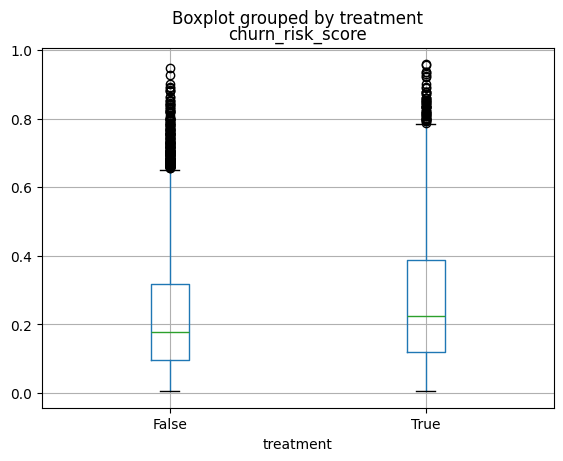

In [44]:
# Boxplots del churn_risk_score según si han recibido o no el tratamiento.
df.boxplot(column='churn_risk_score', by='treatment')

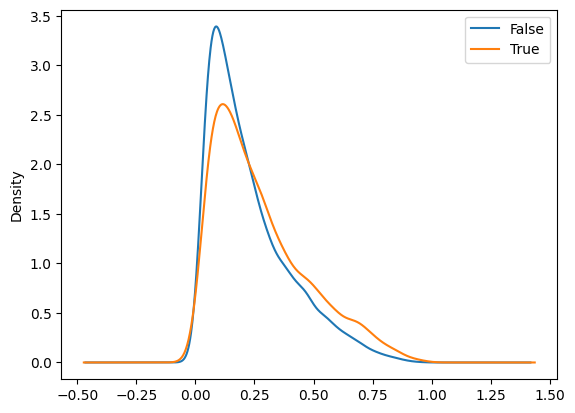

In [47]:
# Density plots del churn_risk_score según si han recibido o no el tratamiento.
df.groupby('treatment')['churn_risk_score'].plot(kind='kde', legend=True);

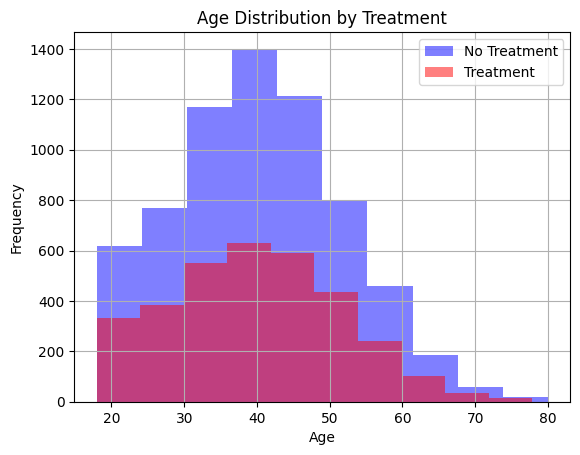

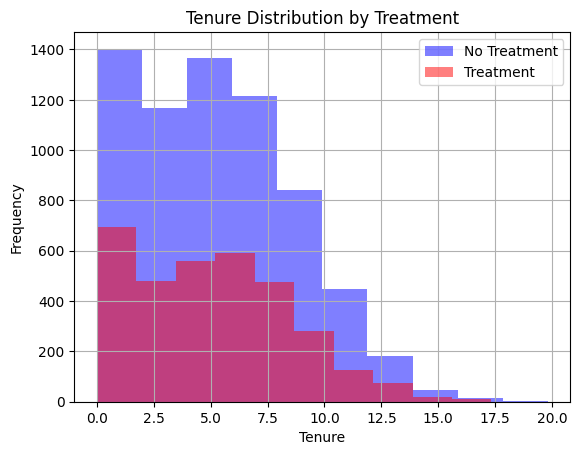

In [48]:
import matplotlib.pyplot as plt

# Superpose histograms for age
df[df['treatment'] == 0]['age'].hist(alpha=0.5, color='blue', label='No Treatment')
df[df['treatment'] == 1]['age'].hist(alpha=0.5, color='red', label='Treatment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Treatment')
plt.legend()
plt.show()

# Superpose histograms for tenure
df[df['treatment'] == 0]['tenure'].hist(alpha=0.5, color='blue', label='No Treatment')
df[df['treatment'] == 1]['tenure'].hist(alpha=0.5, color='red', label='Treatment')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution by Treatment')
plt.legend()
plt.show()

In [49]:
# Correlaciones entre variables numericas, sobre todo con churn_risk_score, para que vean rápidamente posibles 
# sesgos en la asignación.
corr_table = df.select_dtypes(include=['float64', 'int64']).corr()

corr_table['churn_risk_score']

age                           -0.206326
household_size                 0.006366
tenure                        -0.264398
payment_history                0.501019
monthly_consumption           -0.087767
customer_satisfaction_score   -0.616517
complaints_last_year           0.569146
churn_risk_score               1.000000
Name: churn_risk_score, dtype: float64

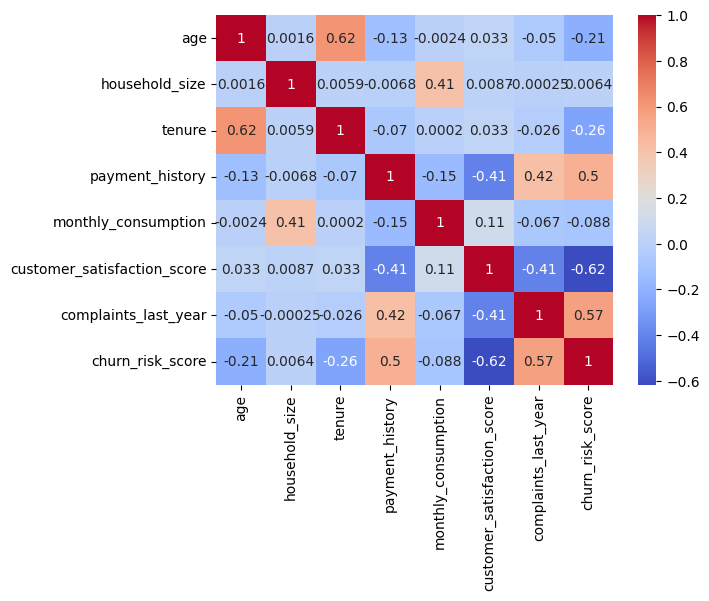

In [50]:
# Correlation matrix
import seaborn as sns

sns.heatmap(corr_table, annot=True, cmap='coolwarm')
plt.show()